In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,Imputer
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [135]:
t=pd.read_csv('C:/Users/hp/Downloads/Github/dataset1-master/train_datamart.csv')
mart=pd.DataFrame(t)
mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [136]:
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [137]:
mart.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [138]:
mart.shape

(8523, 9)

In [139]:
mart.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [140]:
mart['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [141]:
le=LabelEncoder()
list=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in list:
    mart[val]=le.fit_transform(mart[val].astype(str))

In [142]:
imp=Imputer(missing_values='NaN',strategy='mean')
mart['Item_Weight']=imp.fit_transform(mart['Item_Weight'].values.reshape(-1,1))

In [143]:
im=Imputer(missing_values='NaN',strategy='most_frequent')
mart['Outlet_Size']=imp.fit_transform(mart['Outlet_Size'].values.reshape(-1,1))

In [144]:
mart.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [145]:
mart.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1.736360,1.112871,1.201220,2181.288914
std,4.226124,0.644810,0.051598,4.209990,62.275067,0.989181,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1.000000,0.000000,1.000000,834.247400
50%,12.857645,1.000000,0.053931,6.000000,143.012800,2.000000,1.000000,1.000000,1794.331000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,3.000000,2.000000,1.000000,3101.296400
max,21.350000,4.000000,0.328391,15.000000,266.888400,3.000000,2.000000,3.000000,13086.964800


In [146]:
from scipy.stats import boxcox
mart['Item_Outlet_Sales']=boxcox(mart['Item_Outlet_Sales'],0)
mart['Item_MRP']=boxcox(mart['Item_MRP'],0)

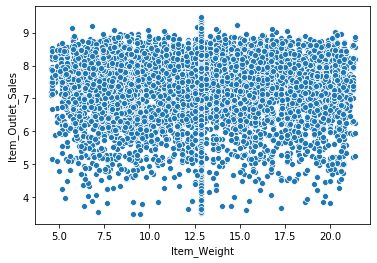

In [147]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=mart)

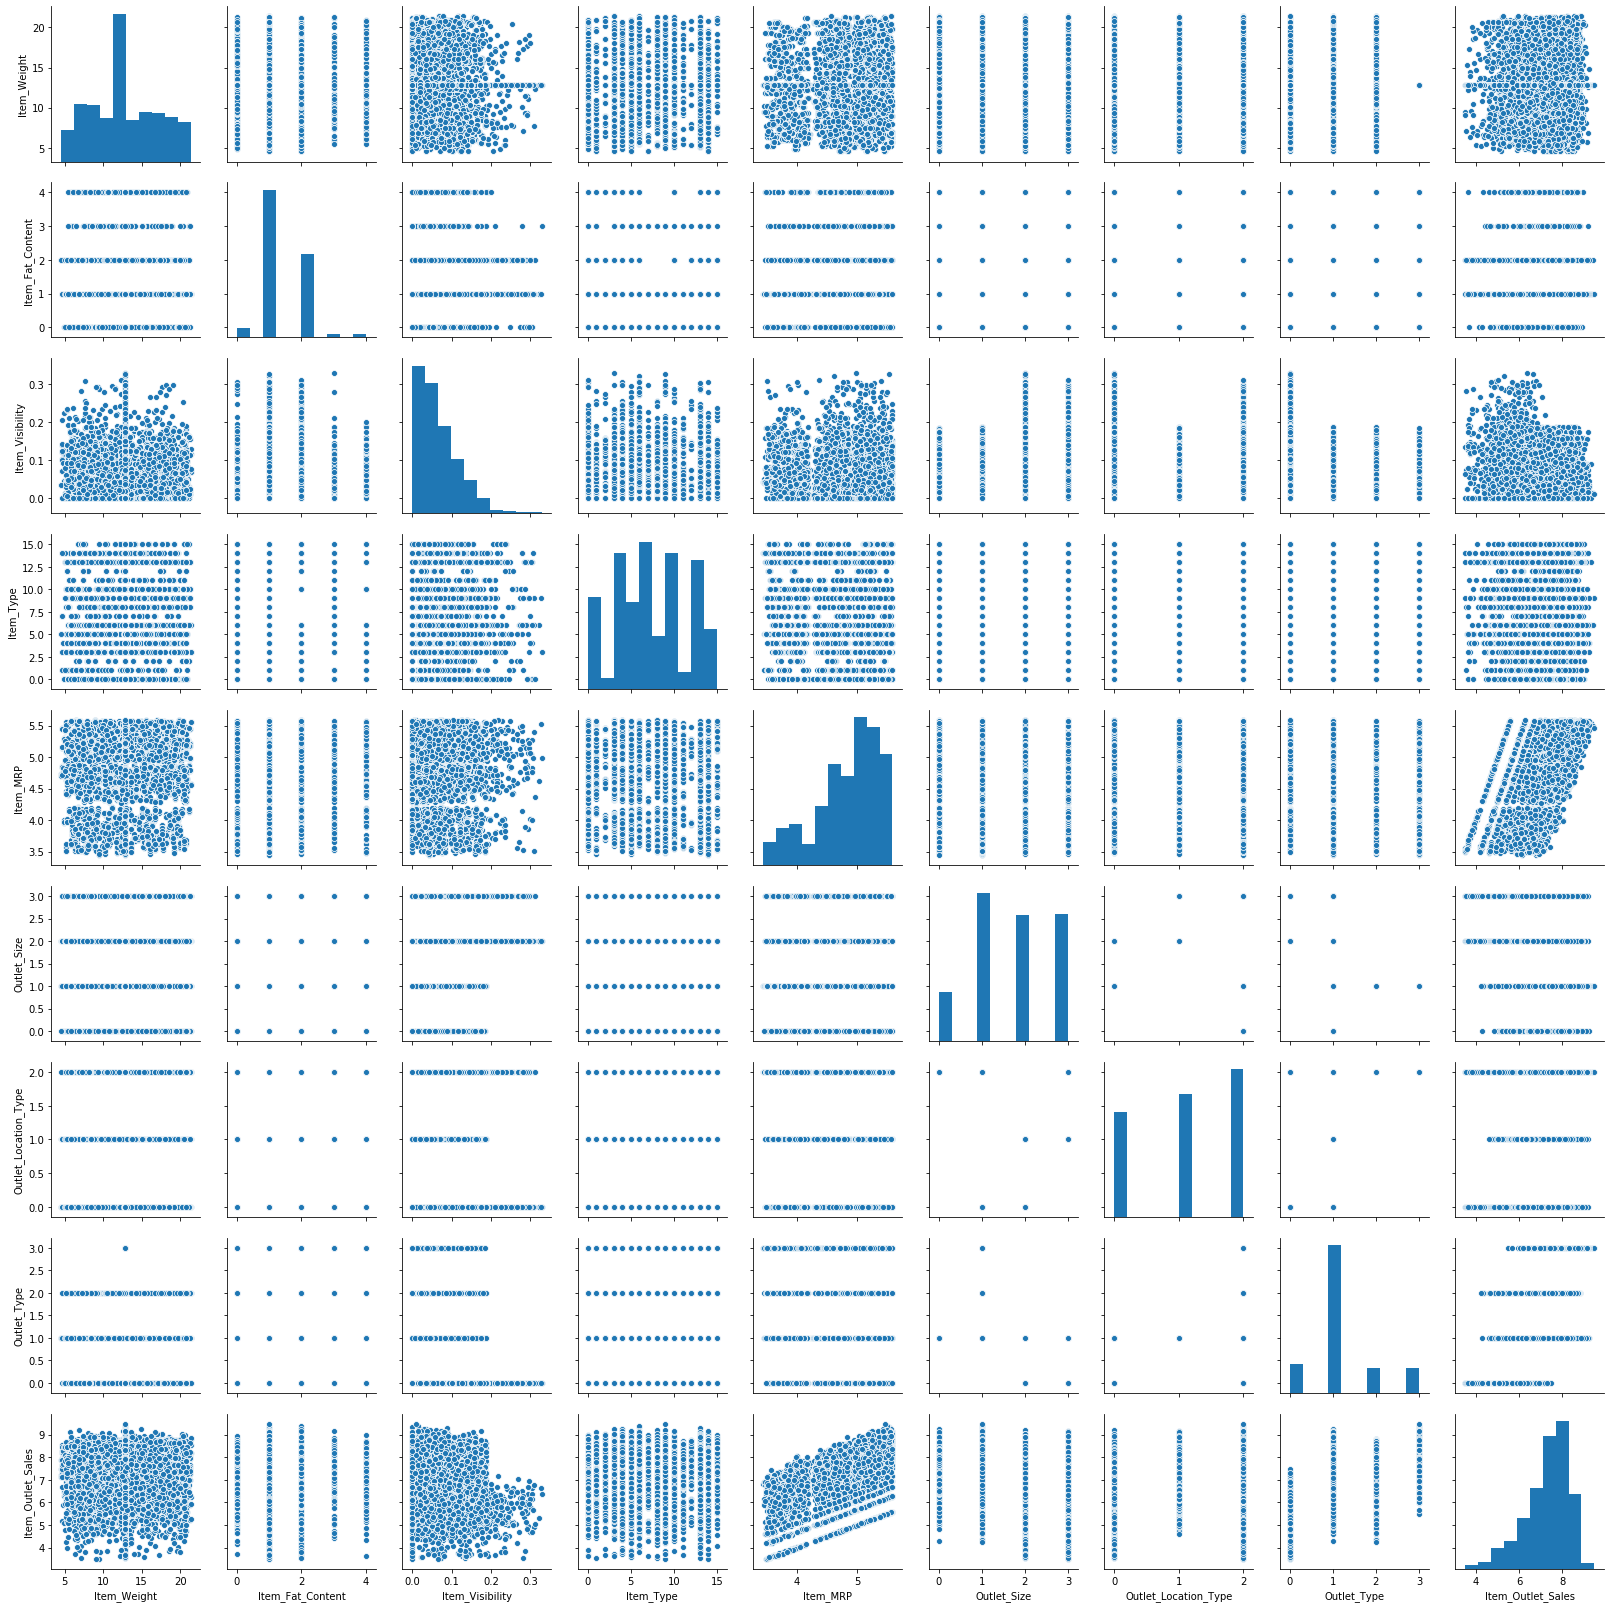

In [148]:
sns.pairplot(mart)

In [149]:
def_x=mart.iloc[:,:-1]
y=mart.iloc[:,-1]

In [150]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(x)
x=scale.transform(x)
x=pd.DataFrame(x,columns=def_x.columns)
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.841872,-0.572844,-0.970732,-0.766479,1.316404,-0.744458,-1.369334,-0.252658
1,-1.641706,0.978092,-0.908111,1.608963,-1.808494,-0.744458,1.091569,1.002972
2,1.098554,-0.572844,-0.956917,0.658786,0.237521,-0.744458,-1.369334,-0.252658
3,1.500838,0.978092,-1.281758,-0.291391,0.715398,1.277535,1.091569,-1.508289
4,-0.929428,-0.572844,-1.281758,0.421242,-1.600117,-1.755454,1.091569,-0.252658
...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.572844,-0.181193,1.371418,1.026923,-1.755454,1.091569,-0.252658
8519,-1.059578,0.978092,-0.371154,-1.716656,-0.274866,1.277535,-0.138882,-0.252658
8520,-0.534243,-0.572844,-0.599784,0.183698,-0.730120,0.266539,-0.138882,-0.252658
8521,-1.336444,0.978092,1.532880,1.371418,-0.365278,-0.744458,1.091569,1.002972


In [151]:
def random(alg,x,y):
    r_state=0
    for r_score in range(43,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r_state,'at',r_score)

In [152]:
def metrics(y_test,pred):
    print('mean_squared_errpr=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('R2_score=',r2_score(y_test,pred))

In [153]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()
random(lr,x,y)

0.5792793993955414 at 99


In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=99)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
metrics(y_test,pred)

mean_squared_errpr= 0.4474227731862813
mean_absolute_error= 0.5298753678988747
R2_score= 0.5669585330851026


In [155]:
lrscore=cross_val_score(lr,x,y,cv=5)
print(lrscore.mean())
print(lrscore.std())

0.5531120303413475
0.013011406881234143


In [156]:
l=Lasso()
parameters={'alpha':[1,0.1,0.01,0.001,0]}
grid=GridSearchCV(estimator=l,param_grid=parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'alpha': 0.001}

In [157]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.5476634385715768

In [158]:
r=Ridge()
parameters={'alpha':[1,0.1,0.01,0.001,0]}
grid=GridSearchCV(estimator=r,param_grid=parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'alpha': 1}

In [159]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5476718449599021

In [160]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr,x,y)

0.48887831973638973 at 99


In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=99)
dtr.fit(x_train,y_train)
pred=lr.predict(x_test)
metrics(y_test,pred)

mean_squared_errpr= 0.4474227731862813
mean_absolute_error= 0.5298753678988747
R2_score= 0.5669585330851026


In [162]:
dtrscore=cross_val_score(dtr,x,y,cv=5)
print(dtrscore.mean())
print(dtrscore.std())

0.44135627288567275
0.03595404619141386


In [163]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
random(knr,x,y)

0.6866006199498442 at 99


In [164]:
parameters={'n_neighbors':range(1,40)}
grd=GridSearchCV(knr,parameters)
grd.fit(x_train,y_train)
grd.best_params_

{'n_neighbors': 14}

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=99)
knr.fit(x_train,y_train)
pred=lr.predict(x_test)
metrics(y_test,pred)

mean_squared_errpr= 0.4474227731862813
mean_absolute_error= 0.5298753678988747
R2_score= 0.5669585330851026


In [166]:
knrscore=cross_val_score(knr,x,y,cv=5)
print(knrscore.mean())
print(knrscore.std())

0.6684282897550693
0.01850004857523747


In [167]:
from sklearn.svm import SVR
svm=SVR()
random(svm,x,y)

0.737219988071043 at 99


In [168]:
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
gd=GridSearchCV(svm,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=99)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
metrics(y_test,pred)

mean_squared_errpr= 0.27715938050483085
mean_absolute_error= 0.4038002418519617
R2_score= 0.7317492271385434


In [170]:
svmscore=cross_val_score(svm,x,y,cv=5)
print(svmscore.mean())
print(svmscore.std())

0.7215025680402652
0.013240621465276709


In [171]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
random(rf,x,y)

0.694371033005148 at 99


In [172]:
parameters={'n_estimators':[10,100,500,1000]}
grid=GridSearchCV(rf,parameters)
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 1000}

In [173]:
rf=RandomForestRegressor(n_estimators=1000,random_state=99)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
metrics(y_test,pred)

mean_squared_errpr= 0.2945928281551097
mean_absolute_error= 0.4285530964640225
R2_score= 0.7148761348502399


From the above algorithms,Support vector machine gives the best score of 0.73 at random state of 99

In [174]:
from sklearn.svm import SVR
svm=SVR(kernel='rbf')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=99)
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
metrics(y_test,pred)

mean_squared_errpr= 0.27715938050483085
mean_absolute_error= 0.4038002418519617
R2_score= 0.7317492271385434


In [175]:
from sklearn.externals import joblib
joblib.dump(svm,'sale_prediction.pkl')

['sale_prediction.pkl']